# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import json
import requests
from api_keys import weather_api_key
import numpy as np
from citipy import citipy
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
city_list = []
lat_list = []
lng_list = []
for i in range(0,1500):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat,lng).city_name 
    if city not in city_list: 
        city_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
    
print(len(city_list))
print(len(lat_list))
print(len(lng_list))

587
587
587


In [3]:
cities_df = pd.DataFrame({'Nearest City' : city_list, 'Latitude' : lat_list, 'Longitude': lng_list})
cities_df = cities_df.rename(columns={0:'Nearest City'})
cities_df

,Nearest City,Latitude,Longitude
0,albany,-72.120226,98.087276
1,mataura,-34.555120,-155.334806
2,cherskiy,87.208151,161.178220
3,maragogi,-11.155066,-32.160852
4,ivankiv,50.893011,29.944007
...,...,...,...
582,ca mau,8.129915,105.054083
583,sistranda,67.919185,7.175898
584,talnakh,69.030575,95.050349
585,sidi ali,35.030005,0.723707


In [4]:
cities_df

,Nearest City,Latitude,Longitude
0,albany,-72.120226,98.087276
1,mataura,-34.555120,-155.334806
2,cherskiy,87.208151,161.178220
3,maragogi,-11.155066,-32.160852
4,ivankiv,50.893011,29.944007
...,...,...,...
582,ca mau,8.129915,105.054083
583,sistranda,67.919185,7.175898
584,talnakh,69.030575,95.050349
585,sidi ali,35.030005,0.723707


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

units = 'imperial'

cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

for index, row in cities_df.iterrows():
    query_url = f"{url}{row['Nearest City']}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
    except (KeyError, IndexError):
        print(f"Missing City records for {index} : {row['Nearest City']} ... skipping.")
  

Missing City records for 15 : sentyabrskiy ... skipping.
Missing City records for 17 : umzimvubu ... skipping.
Missing City records for 36 : paradwip ... skipping.
Missing City records for 85 : illoqqortoormiut ... skipping.
Missing City records for 114 : karaul ... skipping.
Missing City records for 121 : bengkalis ... skipping.
Missing City records for 127 : taolanaro ... skipping.
Missing City records for 129 : lolua ... skipping.
Missing City records for 141 : nizhneyansk ... skipping.
Missing City records for 143 : duz ... skipping.
Missing City records for 147 : gurskoye ... skipping.
Missing City records for 150 : burkhala ... skipping.
Missing City records for 157 : mys shmidta ... skipping.
Missing City records for 159 : attawapiskat ... skipping.
Missing City records for 167 : vaitupu ... skipping.
Missing City records for 173 : khonuu ... skipping.
Missing City records for 177 : tsihombe ... skipping.
Missing City records for 182 : marcona ... skipping.
Missing City records 

In [6]:
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,-72.120226,98.087276,67.44,86,64,3
1,mataura,-34.555120,-155.334806,39.54,73,90,3.91
2,cherskiy,87.208151,161.178220,56.73,36,53,6.51
3,maragogi,-11.155066,-32.160852,77.4,78,20,10.33
4,ivankiv,50.893011,29.944007,57.36,92,0,1.99
...,...,...,...,...,...,...,...
582,ca mau,8.129915,105.054083,76.33,95,100,7.14
583,sistranda,67.919185,7.175898,51.76,89,5,23.67
584,talnakh,69.030575,95.050349,17.04,97,50,2.35
585,sidi ali,35.030005,0.723707,63.18,82,36,4.99


In [7]:
cities_df['Temperature (F)'] = cities_df['Temperature (F)'].replace("", np.nan)
cities_df = cities_df.dropna(axis=0, subset=['Temperature (F)'])
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,-72.120226,98.087276,67.44,86,64,3
1,mataura,-34.555120,-155.334806,39.54,73,90,3.91
2,cherskiy,87.208151,161.178220,56.73,36,53,6.51
3,maragogi,-11.155066,-32.160852,77.40,78,20,10.33
4,ivankiv,50.893011,29.944007,57.36,92,0,1.99
...,...,...,...,...,...,...,...
582,ca mau,8.129915,105.054083,76.33,95,100,7.14
583,sistranda,67.919185,7.175898,51.76,89,5,23.67
584,talnakh,69.030575,95.050349,17.04,97,50,2.35
585,sidi ali,35.030005,0.723707,63.18,82,36,4.99


In [8]:
cities_df = cities_df.reset_index(drop=True)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,-72.120226,98.087276,67.44,86,64,3
1,mataura,-34.555120,-155.334806,39.54,73,90,3.91
2,cherskiy,87.208151,161.178220,56.73,36,53,6.51
3,maragogi,-11.155066,-32.160852,77.40,78,20,10.33
4,ivankiv,50.893011,29.944007,57.36,92,0,1.99
...,...,...,...,...,...,...,...
530,ca mau,8.129915,105.054083,76.33,95,100,7.14
531,sistranda,67.919185,7.175898,51.76,89,5,23.67
532,talnakh,69.030575,95.050349,17.04,97,50,2.35
533,sidi ali,35.030005,0.723707,63.18,82,36,4.99


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.to_csv('Cities_Weather_Data.csv', index=False)

In [10]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [11]:
cities_df['Humidity (%)'] = cities_df['Humidity (%)'].astype(float)
cities_df['Cloudiness (%)'] = cities_df['Cloudiness (%)'].astype(float)
cities_df['Wind Speed (mph)'] = cities_df['Wind Speed (mph)'].astype(float)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,-72.120226,98.087276,67.44,86.0,64.0,3.00
1,mataura,-34.555120,-155.334806,39.54,73.0,90.0,3.91
2,cherskiy,87.208151,161.178220,56.73,36.0,53.0,6.51
3,maragogi,-11.155066,-32.160852,77.40,78.0,20.0,10.33
4,ivankiv,50.893011,29.944007,57.36,92.0,0.0,1.99
...,...,...,...,...,...,...,...
530,ca mau,8.129915,105.054083,76.33,95.0,100.0,7.14
531,sistranda,67.919185,7.175898,51.76,89.0,5.0,23.67
532,talnakh,69.030575,95.050349,17.04,97.0,50.0,2.35
533,sidi ali,35.030005,0.723707,63.18,82.0,36.0,4.99


In [12]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
cities_df[cities_df['Humidity (%)']>100]

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [14]:
#  Get the indices of cities that have humidity over 100%.


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

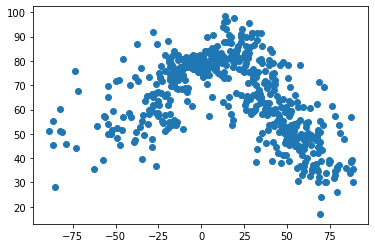

In [16]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'])
plt.show()

Analysis - The Temperatures increase as the latitude moves from latitudes -90 to 0 and from 90 to 0, 0 being the equator, -90 being southpole and 90 being northpole.

## Latitude vs. Humidity Plot

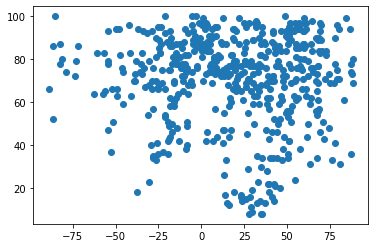

In [17]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'])

Analysis - 

## Latitude vs. Cloudiness Plot

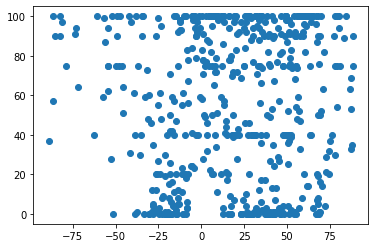

In [18]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'])

Analysis - 

## Latitude vs. Wind Speed Plot

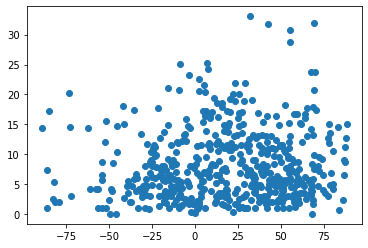

In [19]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'])

Analysis - 

## Linear Regression

In [20]:
Northern_df = cities_df[cities_df['Latitude']>0]
Northern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2,cherskiy,87.208151,161.178220,56.73,36.0,53.0,6.51
4,ivankiv,50.893011,29.944007,57.36,92.0,0.0,1.99
8,norman wells,78.181183,-117.402020,57.24,41.0,75.0,14.97
9,atuona,8.482568,-130.483105,79.02,76.0,72.0,11.90
10,tuktoyaktuk,88.214118,-117.449598,30.20,69.0,75.0,12.66
...,...,...,...,...,...,...,...
530,ca mau,8.129915,105.054083,76.33,95.0,100.0,7.14
531,sistranda,67.919185,7.175898,51.76,89.0,5.0,23.67
532,talnakh,69.030575,95.050349,17.04,97.0,50.0,2.35
533,sidi ali,35.030005,0.723707,63.18,82.0,36.0,4.99


In [21]:
Southern_df = cities_df[cities_df['Latitude']<0]
Southern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,-72.120226,98.087276,67.44,86.0,64.0,3.00
1,mataura,-34.555120,-155.334806,39.54,73.0,90.0,3.91
3,maragogi,-11.155066,-32.160852,77.40,78.0,20.0,10.33
5,rikitea,-73.501084,-132.438795,76.03,72.0,91.0,20.31
6,meulaboh,-5.072145,90.040229,78.15,89.0,100.0,15.86
...,...,...,...,...,...,...,...
507,eten,-7.497281,-80.329306,68.97,82.0,20.0,12.26
512,san cristobal,-8.268944,-88.082173,78.98,51.0,83.0,5.30
516,namibe,-10.865570,4.738604,74.19,72.0,0.0,2.30
522,warmbad,-28.430923,17.819452,65.34,35.0,4.0,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

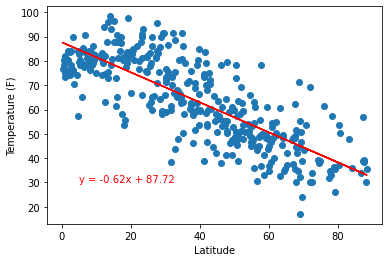

In [22]:
x = Northern_df['Latitude']
y = Northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(5,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

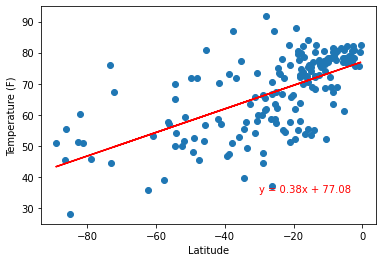

In [23]:
x = Southern_df['Latitude']
y = Southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-30,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

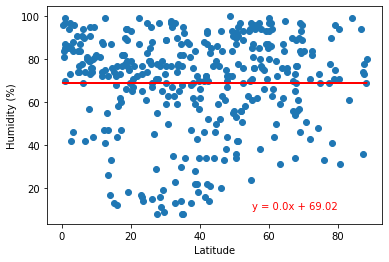

In [24]:
x = Northern_df['Latitude']
y = Northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

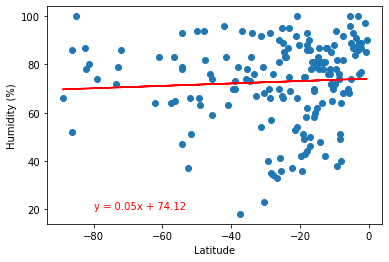

In [25]:
x = Southern_df['Latitude']
y = Southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-80,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

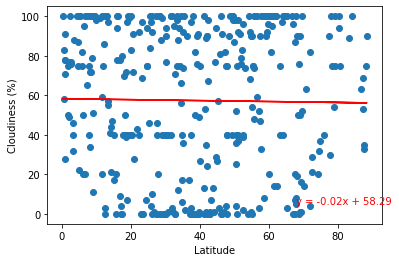

In [26]:
x = Northern_df['Latitude']
y = Northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

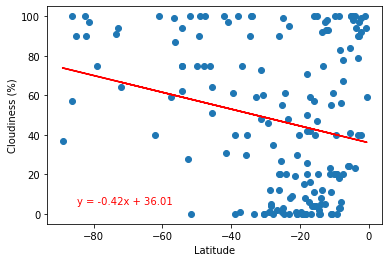

In [27]:
x = Southern_df['Latitude']
y = Southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

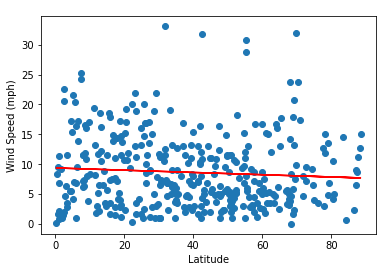

In [28]:
x = Northern_df['Latitude']
y = Northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

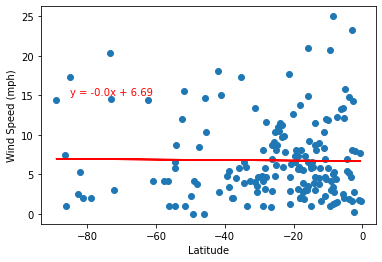

In [29]:
x = Southern_df['Latitude']
y = Southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()